In [1]:

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_csv('drawn_images.csv')
df

,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = df.iloc[:, 0]  # First column as 'y'
x = df.iloc[:, 1:]  # Remaining columns as 'X'

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
some_digit = x.loc[0].array
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

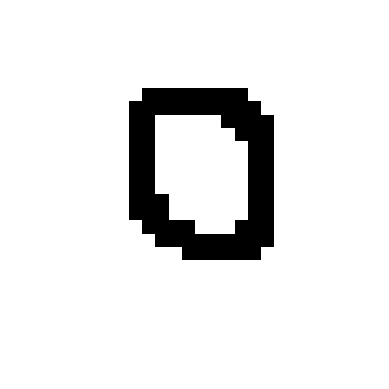

In [7]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [8]:
y[0]

0

In [9]:
from sklearn import svm

In [12]:
model_RBF = svm.SVC(degree=3, gamma="scale", kernel="rbf")
model_RBF.fit(x, y)

ValueError: The number of classes has to be greater than one; got 1 class

In [11]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
import pandas as pd

class DrawApp:
    def __init__(self, root):
        self.root = root
        self.canvas = tk.Canvas(root, width=280, height=280, bg='white')
        self.canvas.pack()
        self.image = Image.new('L', (28, 28), 'white')
        self.draw = ImageDraw.Draw(self.image)

        self.canvas.bind("<Button-1>", self.paint)
        self.canvas.bind("<B1-Motion>", self.paint)

        self.process_button = tk.Button(root, text="Process Image", command=self.process_image)
        self.process_button.pack()

    def paint(self, event):
        x1, y1 = (event.x - 5), (event.y - 5)
        x2, y2 = (event.x + 5), (event.y + 5)
        self.canvas.create_oval(x1, y1, x2, y2, fill='black', width=0)
        self.draw.ellipse([x1 // 10, y1 // 10, x2 // 10, y2 // 10], fill='black')

    def process_image(self):
        self.image = ImageOps.invert(self.image)
        data = np.array(self.image).reshape(1, 28, 28, 1)
        flattened_array = data.flatten()
        df = pd.DataFrame([flattened_array])
        df.columns = [f'pixel{i+1}' for i in range(flattened_array.size)]
        predict = model_RBF.predict(df)
        print(predict)
        self.clear_canvas()
        
    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new('L', (28, 28), 'white')
        self.draw = ImageDraw.Draw(self.image)


root = tk.Tk()
app = DrawApp(root)
root.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/envs/eda_env/lib/python3.12/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/wl/q8prsl_x2_g_hl0vv6cf0xj00000gn/T/ipykernel_18298/1786071826.py", line 32, in process_image
    predict = model_RBF.predict(df)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/eda_env/lib/python3.12/site-packages/sklearn/svm/_base.py", line 813, in predict
    y = super().predict(X)
        ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/eda_env/lib/python3.12/site-packages/sklearn/svm/_base.py", line 428, in predict
    X = self._validate_for_predict(X)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/eda_env/lib/python3.12/site-packages/sklearn/svm/_base.py", line 635, in _validate_for_predict
    sv = self.support_vectors_
         ^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'SVC' object has no attribute 'support_vectors_